# Standard node-classification using 

Revision - 1.00, 16th October.2020

In [1]:
import torch
from torch_geometric.datasets import TUDataset
from torch_geometric.datasets import Planetoid
from torch_geometric.data import DataLoader
import networkx as nx
import time
from datetime import datetime
from tensorboardX import SummaryWriter
# to visualize high dimensional data
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
sys.path.append(f"C:\\Users\\verma\\Desktop\\git\\anshul")

import GNN.torch.gcn_v1

Here a node classification task on the Citeseer citation network (A standard citation-graph with a ~2000 nodes)

In [2]:
writer = SummaryWriter("./log/" + datetime.now().strftime("%Y%m%d-%H%M%S"))

# stndard data-set for node classification
dataset = Planetoid(root='/tmp/cora', name='cora')
task = 'node'

# By default the version 1  mode has 3 layers  and 200 epochs will change it to a class which can then be used
model = GNN.torch.gcn_v1.train(dataset, task, writer)

Epoch 0. Loss: 1.9939. Validation accuracy: 0.0920
Epoch 10. Loss: 0.5352. Validation accuracy: 0.3510
Epoch 20. Loss: 0.0641. Validation accuracy: 0.3680
Epoch 30. Loss: 0.0244. Validation accuracy: 0.3570
Epoch 40. Loss: 0.0078. Validation accuracy: 0.3600
Epoch 50. Loss: 0.0160. Validation accuracy: 0.3720
Epoch 60. Loss: 0.0192. Validation accuracy: 0.3600
Epoch 70. Loss: 0.0121. Validation accuracy: 0.3750
Epoch 80. Loss: 0.0036. Validation accuracy: 0.3570
Epoch 90. Loss: 0.0103. Validation accuracy: 0.3660
Epoch 100. Loss: 0.0512. Validation accuracy: 0.3830
Epoch 110. Loss: 0.0021. Validation accuracy: 0.3850
Epoch 120. Loss: 0.0022. Validation accuracy: 0.3830
Epoch 130. Loss: 0.0066. Validation accuracy: 0.3840
Epoch 140. Loss: 0.0089. Validation accuracy: 0.3750
Epoch 150. Loss: 0.0024. Validation accuracy: 0.3680
Epoch 160. Loss: 0.0019. Validation accuracy: 0.3800
Epoch 170. Loss: 0.0037. Validation accuracy: 0.3670
Epoch 180. Loss: 0.0386. Validation accuracy: 0.3610
Epoc

## Visualizing Node embeddings 
(on entire dataset includes training points) --> will improve in new versions

Text(0.5, 1.0, 'Node embeddings using GCN')

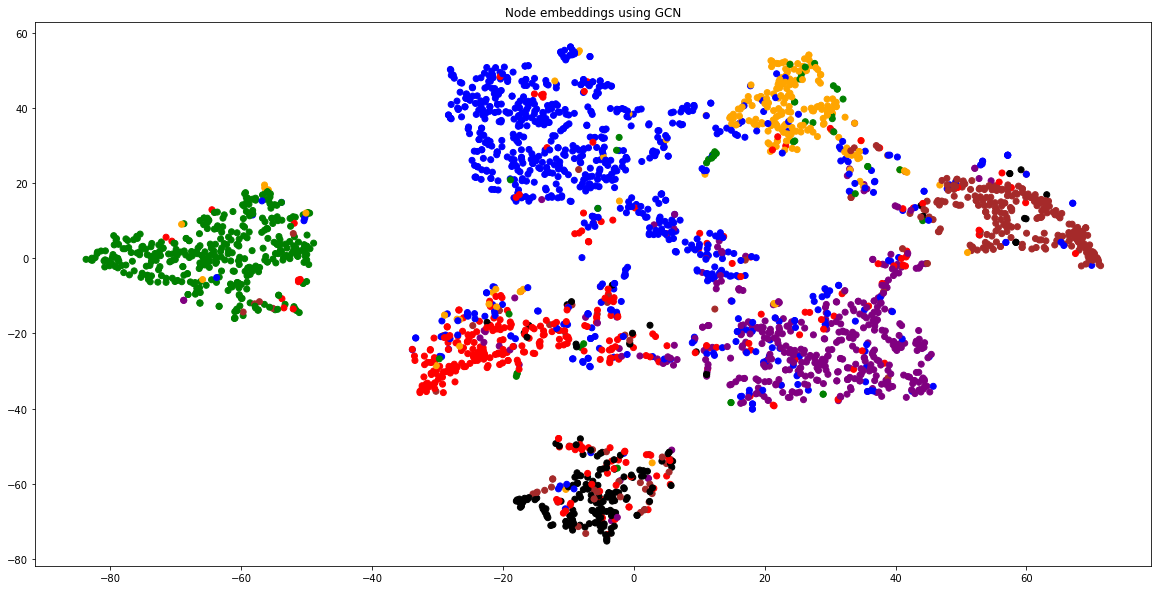

In [3]:
color_list = ["red", "orange", "green", "blue", "purple", "brown", "black"] #7-different classes

loader = DataLoader(dataset, batch_size=64, shuffle=True)
embs = []
colors = []
for batch in loader:
    emb, pred = model(batch)
    embs.append(emb)
    colors += [color_list[y] for y in batch.y]
embs = torch.cat(embs, dim=0)

# Transform the embeggings in two dimensions for visualization
xs, ys = zip(*TSNE().fit_transform(embs.detach().numpy()))

plt.figure(figsize=(20,10))
plt.scatter(xs, ys, color=colors)
plt.title('Node embeddings using GCN')

Easy to see that the nodes are getting clustered nicely.

In [4]:
#END